# Librerías

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
import sys
sys.path.insert(0, '../src')
from eda import valores_unicos, agrupar_categoricas, Generate_heatmap_graph

# Lectura

In [3]:
df = pd.read_csv('../data/Hotel Reservations.csv')

Primera visualizacion

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Descripcion

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')
print(f'\nCantidad de duplicados: {df.duplicated().sum()}\n')
print('-'*30 + 'Tipos de columnas'+ '-'*30)
print(df.dtypes)
print('-'*30 + 'Cantidad de nulos' +'-'*30)
df.isna().sum()

Número de filas: 36275, Número de columnas:19

Cantidad de duplicados: 0

------------------------------Tipos de columnas------------------------------
Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests          

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Valores unicos de variables

In [7]:
valores_unicos(df, "booking_status")

,count,share
Not_Canceled,24390,67.24
Canceled,11885,32.76


# Preparaciones

**Target (booking_status)**

Convertir a binaria y visualizar distribucion

In [8]:
df['status'] = [0 if x == 'Not_Canceled' else 1 for x in df.booking_status]

Sampleo

In [9]:
df_sample = df.sample(n=5000, random_state=42)
df_sample.shape

(5000, 20)

Distribucion de target

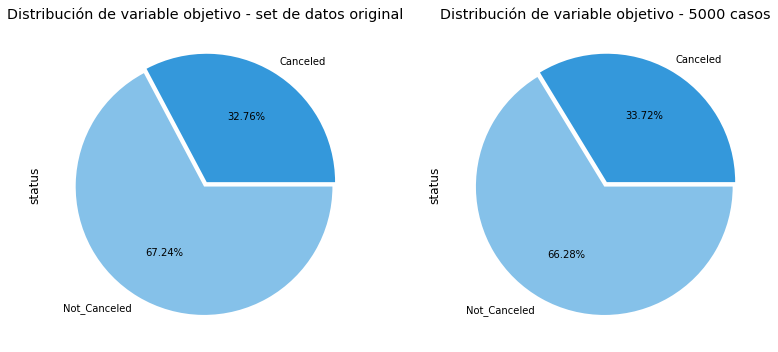

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#3498db', '#85c1e9']

ax1 = df.groupby(['booking_status']).count().plot(kind='pie', y='status', autopct='%.02f%%', explode=(0.02, 0.02), ax=axes[0], colors= colors)
ax1.get_legend().remove()
ax1.set_title('Distribución de variable objetivo - set de datos original')

ax2 = df_sample.groupby(['booking_status']).count().plot(kind='pie', y='status', autopct='%.02f%%', explode=(0.02, 0.02), ax=axes[1], colors= colors)
ax2.get_legend().remove()
ax2.set_title('Distribución de variable objetivo - 5000 casos')

plt.tight_layout()

plt.show()

Eliminamos columna ID

In [11]:
df_sample = df_sample.drop(columns=['Booking_ID'])

# EDA

Descripcion estadistica de variables

In [12]:
df_sample.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1.85,0.10,0.82,2.20,0.03,84.94,2017.82,7.47,15.59,0.02,0.02,0.13,103.65,0.63,0.34
std,0.52,0.39,0.88,1.43,0.16,87.10,0.38,3.12,8.74,0.15,0.35,1.53,34.57,0.79,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,16.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.70,0.00,0.00
50%,2.00,0.00,1.00,2.00,0.00,56.00,2018.00,8.00,15.00,0.00,0.00,0.00,99.45,0.00,0.00
75%,2.00,0.00,2.00,3.00,0.00,124.00,2018.00,10.00,23.00,0.00,0.00,0.00,121.03,1.00,1.00
max,4.00,3.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,11.00,54.00,300.00,4.00,1.00


In [13]:
df_sample.describe(include=['O'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,5000,5000,5000,5000
unique,3,6,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,3824,3854,3256,3314


Visualizamos distribuciones de variables categoricas

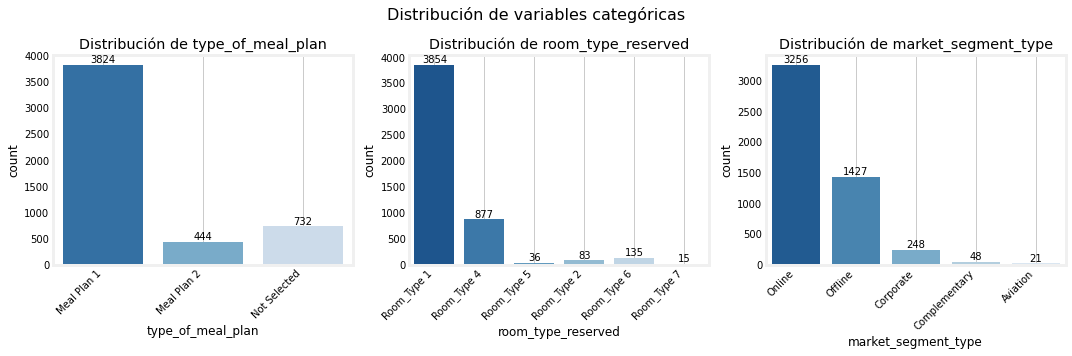

In [14]:
cat_cols = list(df_sample.select_dtypes(include='O').iloc[:,:3].columns)

num_rows = 1
num_cols = len(cat_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

fig.suptitle("Distribución de variables categóricas", fontsize=16)

for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df_sample, x=col, palette='Blues_r', ax=axes[i])
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'Distribución de {col}')
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Notamos que hay algunas categorías con pocos valores, por lo que podrían agruparse

In [15]:
df_sample = agrupar_categoricas(df_sample)

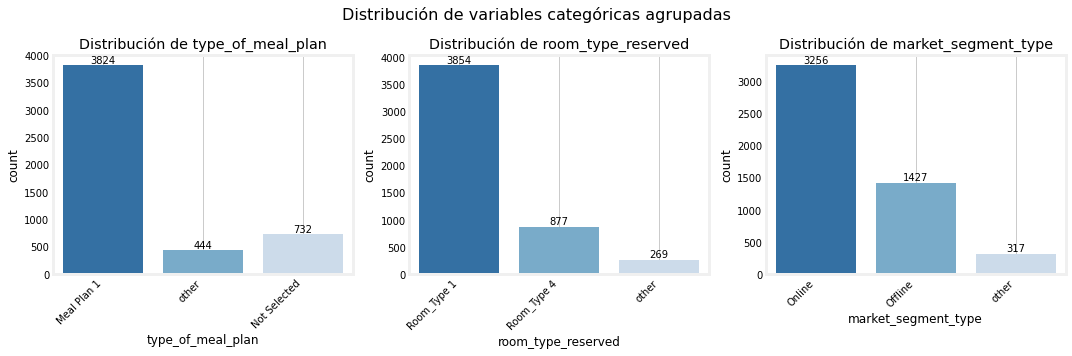

In [16]:
cat_cols = list(df_sample.select_dtypes(include='O').iloc[:,:3].columns)

num_rows = 1
num_cols = len(cat_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

fig.suptitle("Distribución de variables categóricas agrupadas", fontsize=16)

for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df_sample, x=col, palette='Blues_r', ax=axes[i])
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'Distribución de {col}')
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

V-CRAMER

In [17]:
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

def get_cramers_df(data):
    rows = []
    for var1 in data:
        col = []
        for var2 in data:
            cramers = cramers_V(data[var1], data[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)
    cramers_results = np.array(rows)
    return pd.DataFrame(cramers_results, columns = data.columns, index= data.columns)

No se nota relacion alguna entre las variables categoricas

In [18]:
from sklearn import preprocessing
from scipy import stats

label_encoder = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for var in cat_cols:
    data_encoded[var] = label_encoder.fit_transform(df_sample[var])

cramers_df = get_cramers_df(data_encoded)
cramers_df

,type_of_meal_plan,room_type_reserved,market_segment_type
type_of_meal_plan,1.00,0.03,0.08
room_type_reserved,0.03,1.00,0.03
market_segment_type,0.08,0.03,1.00


Relacion categoricas - objetivo

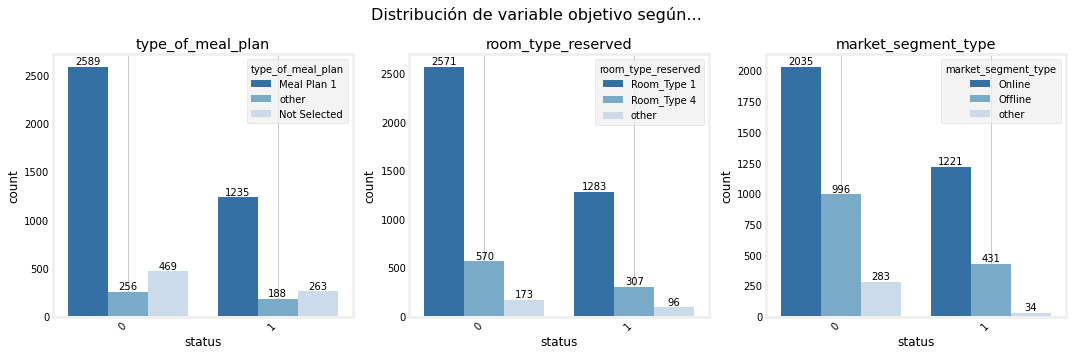

In [19]:
cat_cols = list(df_sample.select_dtypes(include='O').iloc[:,:3].columns)

num_rows = 1
num_cols = len(cat_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

fig.suptitle("Distribución de variable objetivo según...", fontsize=16)

for i, col in enumerate(cat_cols):
    ax = sns.countplot(data=df_sample, x='status', palette='Blues_r', ax=axes[i], hue = col)
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'{col}')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Distribuciones de variables numericas

In [25]:
num_cols = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

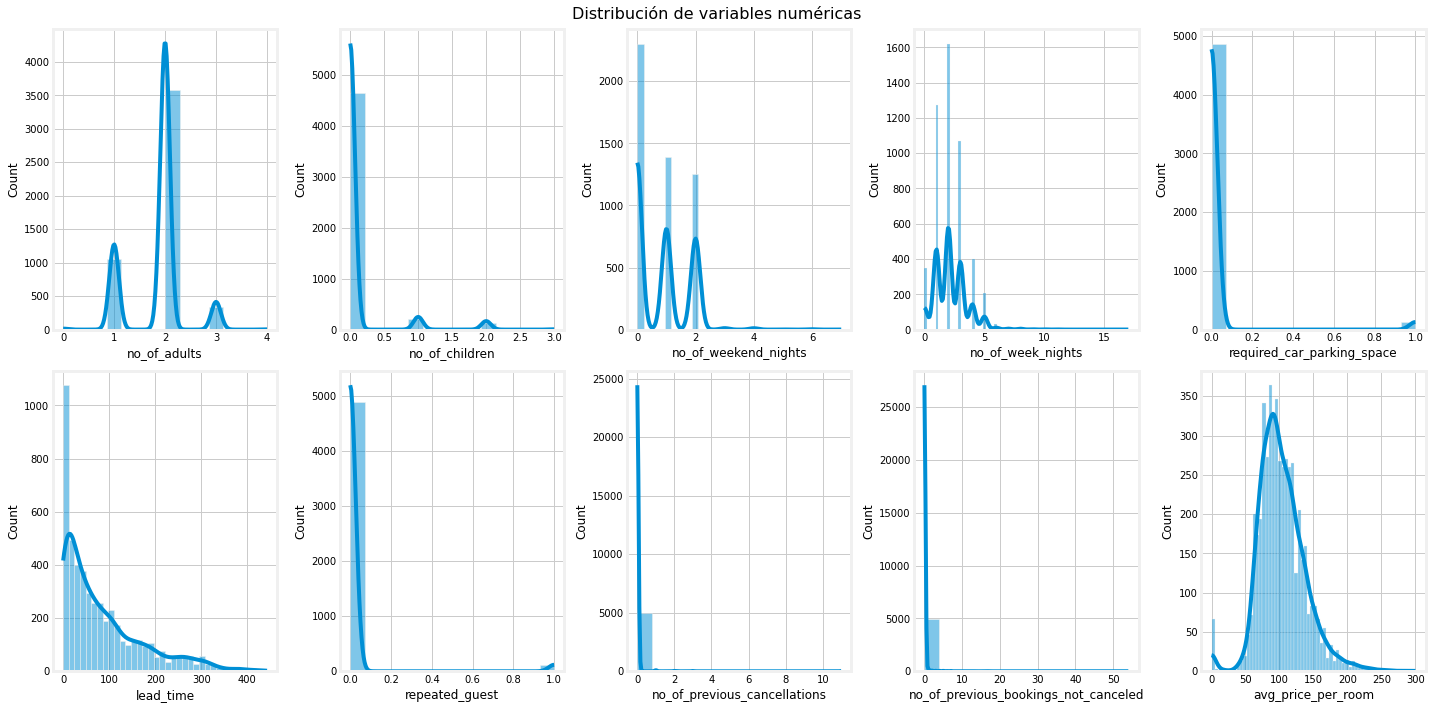

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(20, 10), facecolor='white')
fig.suptitle("Distribución de variables numéricas", fontsize=16)

for i in range(2):
    for j, col in enumerate(num_cols[i * (len(num_cols) // 2): (i + 1) * (len(num_cols) // 2)]):
        ax = sns.histplot(data=df_sample, x=col, kde=True, ax=axes[i, j])
        ax.set_facecolor('white')

plt.tight_layout()
plt.show()


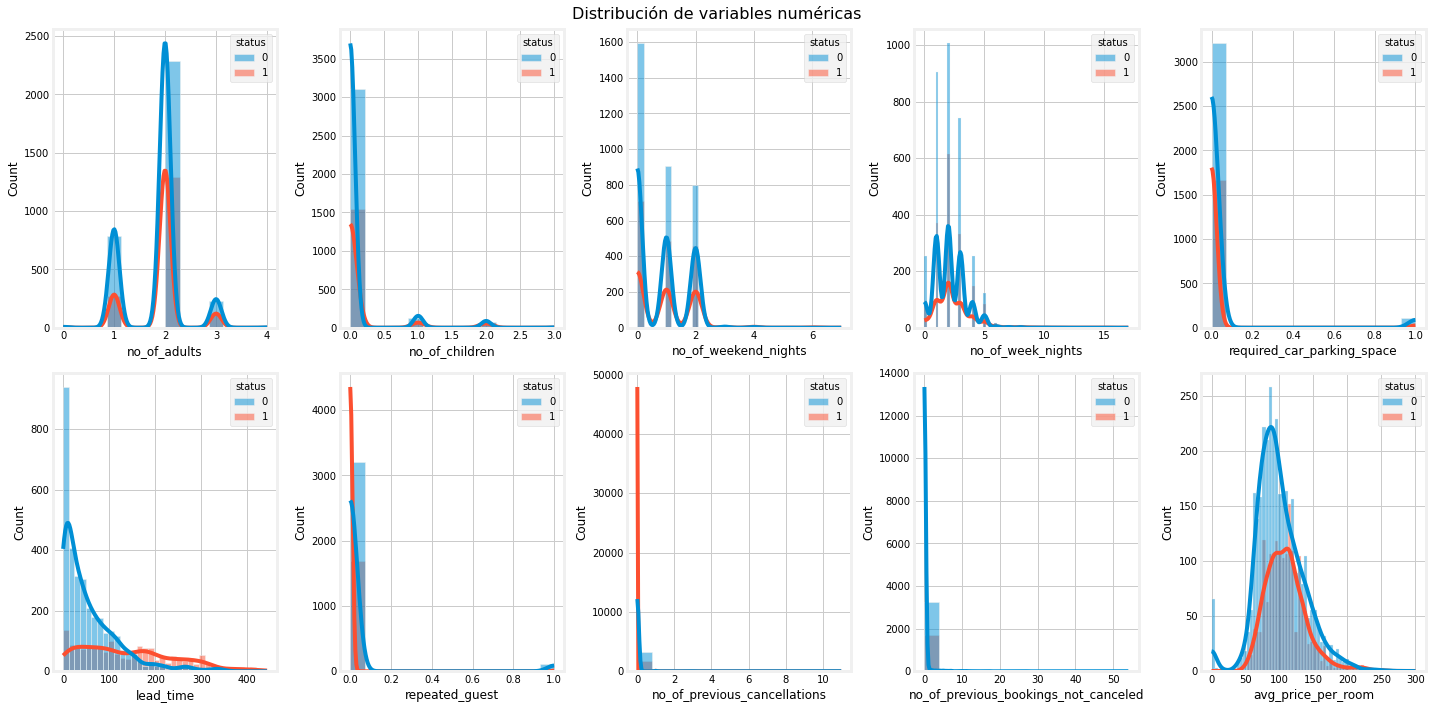

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(20, 10), facecolor='white')
fig.suptitle("Distribución de variables numéricas", fontsize=16)

for i in range(2):
    for j, col in enumerate(num_cols[i * (len(num_cols) // 2): (i + 1) * (len(num_cols) // 2)]):
        ax = sns.histplot(data=df_sample, x=col, kde=True, ax=axes[i, j])
        ax.set_facecolor('white')

plt.tight_layout()
plt.show()


Relacion numerica - objetivo

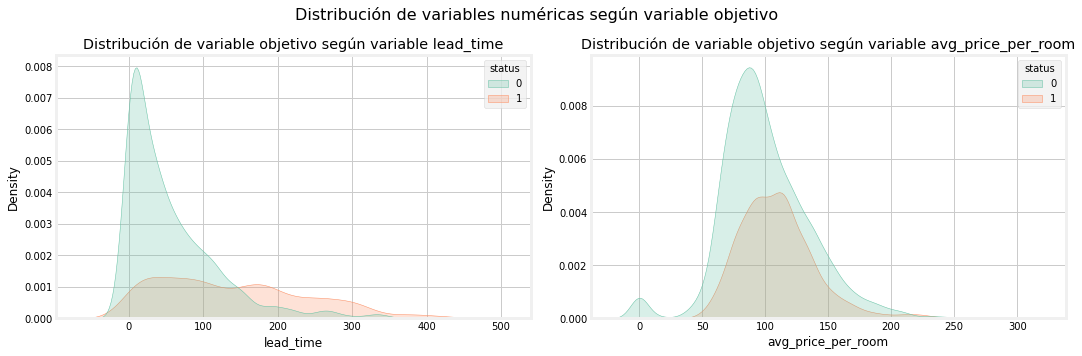

In [42]:
cont_vars = ['lead_time', 'avg_price_per_room']
num_plots = len(cont_vars)

# Create a grid of subplots
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))
fig.suptitle("Distribución de variables numéricas según variable objetivo", fontsize=16)
# Iterate through continuous variables and create KDE plots
for i, col in enumerate(cont_vars):
    ax = axes[i]
    sns.kdeplot(x=col, hue='status', palette='Set2', shade=True, data=df_sample, ax=ax)
    ax.set_title(f'Distribución de variable objetivo según variable {col}')
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

Relaciones entre variables numéricas

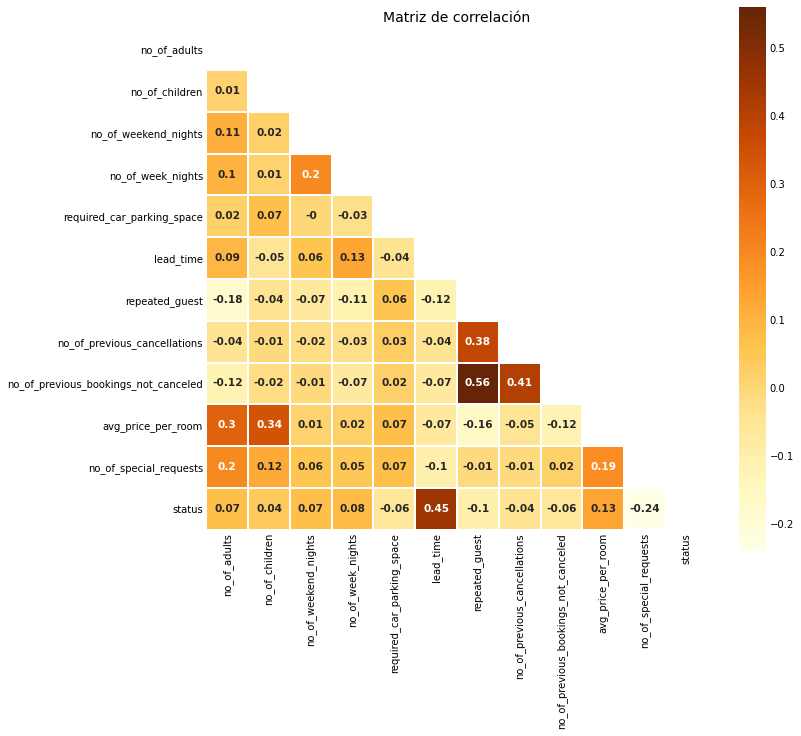

In [26]:
var_corr = round(df_sample[num_cols + ['status']].corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Matriz de correlación'
                       ,mask_uppertri = True)